# Project 4
Submitted By: Prateek Kumar

# Installing mnist package

In [1]:
!pip install --user python-mnist 

# Upgrading the mnist package to latest version

In [2]:
!python -m pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\prateek\anaconda3\lib\site-packages (18.1)


# Checking the working directory so that we do not get the error while accessing the files

In [3]:
import os
cwd = os.getcwd()
cwd                            # We are in the same directory where the files are so the code will fetch them successfully

'C:\\Users\\Prateek\\Desktop\\New folder'

# Importing the required packages

In [4]:
import numpy as np                                         # import numpy
from mnist import MNIST                                    # import mnist
import matplotlib.pyplot as plt                            # import matplotlib.pyplot for plotting framework
from sklearn import neighbors, metrics                     # import neighbors and metrics
from sklearn.metrics import confusion_matrix               # look into metrics and import confusion matrix function
from sklearn.decomposition import PCA                      # import PCA for Linear dimensionality reduction
from sklearn.cross_validation import train_test_split      # import train and test split function from sklearn
from sklearn.cross_validation import cross_val_score       # import cross validation score from sklearn validation
from sklearn import neighbors                              # import neighbors
from sklearn import svm                                    # import svm
from sklearn.metrics import accuracy_score                 # look into metrics and import accuracy score function

C:\Users\Prateek\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Loading the data from the system

In [5]:
data = MNIST()
train_images, train_labels = data.load_training()
test_images, test_labels =  data.load_testing()

# Displaying one of each hand written digit in sorted order

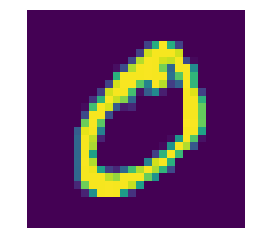

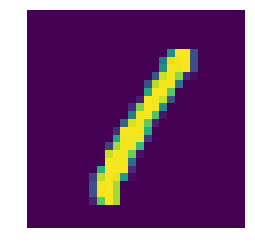

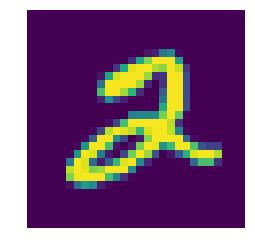

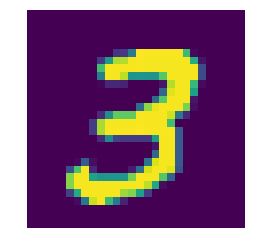

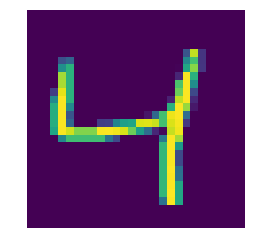

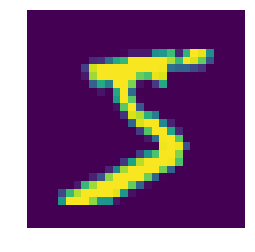

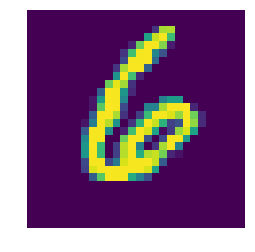

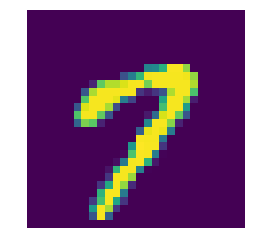

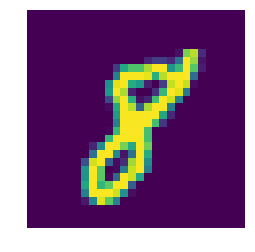

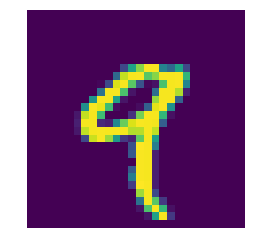

In [6]:
lis1,lis2,i=[],[],0
while(i<len(train_labels)):                   # Running the loop till the last element
    if(train_labels[i] not in lis1):          # Checking for each unique labels
        lis1.append(train_labels[i])          # Appending the labels into the empty list
        lis2.append(i)                        # Appending the index into the empty list
        if(len(lis1)==10):                    # Checking if we got the 10 unique values 
            break
    i+=1
        
for x in range(0,len(lis1)):
    val=lis1.index(x)
    img=plt.imshow(np.array(train_images[lis2[val]],dtype='float').reshape(28,28)) # Displaying the image files
    plt.axis('off')
    plt.show()

# How the K nearest neighbor (kNN) algorithm works

The kNN algorithm expect that an unclassified item can be classified by looking at k of its already-classified, nearest neighbours and discovering which class the largest number of them fall into.The explanation behind picking the closest neighbors to the unknown item is that those are the items which are most similar to it in the attributes used to map the items, so the odds are higher that it has a place with the same class.

So for k = 50, you would examine all the items in the data set of classified items to discover which were the 100 that were nearest to the unclassified item. At that point you would check what number of those fell into each class. In the event that you found that 15 were Class A items, 25 were class B items, and 10 were class C, at that point you would expect that the unclassified item was a Class B item.

# Python functions to compute the accuracy, sensitivity, specificity, precision and negative predictive value.

In [7]:
def accuracy(tp,fp,fn,tn): 
    """(TP+TN)/(TP+TN+FP+FN)"""
    return((tp+tn)/(tp+fp+fn+tn))

def recall(tp,fp,fn,tn):
    """TP/Real Positives"""
    return(tp/(tp+fn))

def specificity(tp,fp,fn,tn):
    """TN/Real Negatives"""
    return(tn/(tn+fp))

def precision(tp,fp,fn,tn):
    """TP/(TP+FP)"""
    return(tp/(tp+fp))

def NegativePredictiveValue(tp,fp,fn,tn):
    """Tn/Predicted Negatives"""
    return(tn/(tn+fn))
    
def f1_score(tp,fp,fn,tn):
    """Harmonic average of precision and recall"""
    p=precision(tp,fp,fn,tn)
    r=recall(tp,fp,fn,tn)
    return(2*p*r/(p+r))

def sensitivity(tp,fp,fn,tn):
    """TP/(TP+FN)"""
    return(tp/(tp+fn))

Ground Truth Prediction Positive Negative Positive TP FP Negative FN TN </table> where
1. TP: true positives: classifier predicts a sample as positive in accordance with ground truth
2. FP: false positive: classifier predicts a sample as positive in conflict with ground truth
3. TN: true negative: classifier predicts a sample as negative in accordance with ground truth
4. FN: false negative: classifier predicts a sample as negative in conflict with ground truth

Accoding to the similarity with the type-I and type-II error we saw previously in hypothesis testing. Using this notation, the accuracy is $$ \text{accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}.$$ The additional metrics of interest:

sensitivity: $$ \text{sensitivity} = \frac{\text{TP}}{\text{TP + FN}}$$
specificity: $$ \text{specificity} = \frac{\text{TN}}{\text{TN + FP} }$$
precision: $$ \text{precision} = \frac{\text{TP}}{\text{TP + FP} }$$
Negative Predictive Value: $$ \text{NPV} = \frac{\text{TN}}{\text{TN + FN} }$$

In [8]:
def subset_images(images,count):                      # Function for creating subset of images
    return(images[0:count])

def subset_labels(labels,count):                      # Function for creating subset of labels
    return(labels[0:count])

test_images=np.asarray(test_images)                   # Converting the training and testing data into arrays from list
train_images=np.asarray(train_images)
test_labels=np.asarray(test_labels)
train_labels=np.asarray(train_labels)

sample_size=5000                                      # Taking sample size as 5000

test_images=subset_images(test_images,sample_size)    # The training and testing data is the sampled one now
train_images=subset_images(train_images,sample_size)
test_labels=subset_images(test_labels,sample_size)
train_labels=subset_images(train_labels,sample_size)

# Apply a KNN Classifier with n_neighbors = {3,4,5}. For each model, 
# 1. Compute the confusion matrix, as applied to the test set
# 2. Report the accuracy, sensitivity, specificity, precision and negative predictive value using your developed functions.
# 3. Compare the different models,

In [9]:
# Defining the classifier
nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)   # n_neighbors = 3
nn4 = neighbors.KNeighborsClassifier(n_neighbors=4)   # n_neighbors = 4
nn5 = neighbors.KNeighborsClassifier(n_neighbors=5)   # n_neighbors = 5

# Train the classifier using the training data
nn3.fit(train_images, train_labels)
nn4.fit(train_images, train_labels)
nn5.fit(train_images, train_labels)

# Compute the prediction of the test set
pred_nn3=nn3.predict(test_images)
pred_nn4=nn4.predict(test_images)
pred_nn5=nn5.predict(test_images)

# For 3 Neighbours

In [10]:
print('For 3 Neighbours')
print('----------------')
c=np.empty([10,10])                                                   # Creating an empty 10 X 10 matrix
for i in range(10):
    for j in range(10):
        c[i,j]=np.sum(np.logical_and(pred_nn3==i, test_labels==j))    # Confusion Matrix
        
print("Confusion Matrix:")
print(c)
        
fp=c.sum(axis=0)-np.diag(c)                                           # Using numpy calculating FP, FN, TP, TN all at once
fn=c.sum(axis=1)-np.diag(c)
tp=np.diag(c)
tn=c.sum()-(fp+fn+tp)

a=accuracy(tp,fp,fn,tn)                                               # calling the respective functions
se=sensitivity(tp,fp,fn,tn)
s=specificity(tp,fp,fn,tn)
p=precision(tp,fp,fn,tn)
n=NegativePredictiveValue(tp,fp,fn,tn)

print('Accuracy =',np.nanmean(a))                                     # Computing the mean values ignoring NaNs
print('Sensitivity =',np.nanmean(se))
print('Specificity =',np.nanmean(s))                                  
print('Precision =',np.nanmean(p))
print('Negative Predictive Value =',np.nanmean(n))

For 3 Neighbours
----------------
Confusion Matrix:
[[455.   0.   9.   2.   0.   5.  11.   0.  16.   4.]
 [  0. 568.  27.   7.   8.   4.   6.  35.   7.   9.]
 [  1.   0. 463.   6.   2.   0.   0.   2.  13.   2.]
 [  0.   2.   5. 444.   0.  16.   0.   2.  16.   8.]
 [  0.   0.   2.   1. 455.   7.   4.   7.   8.  17.]
 [  0.   0.   0.  15.   0. 403.   1.   1.  14.   2.]
 [  3.   1.   5.   1.   5.   9. 440.   0.   3.   1.]
 [  0.   0.  17.   9.   0.   1.   0. 453.   7.   8.]
 [  1.   0.   2.  11.   0.   4.   0.   0. 393.   2.]
 [  0.   0.   0.   4.  30.   7.   0.  12.  12. 467.]]
Accuracy = 0.98164
Sensitivity = 0.9117522465054636
Specificity = 0.9898561081269321
Precision = 0.9078137811865172
Negative Predictive Value = 0.989773083019869


# For 4 Neighbours

In [11]:
print('For 4 Neighbours')
print('----------------')
c=np.empty([10,10])                                                         # Creating an empty 10 X 10 matrix
for i in range(10):
    for j in range(10):
        c[i,j]=np.sum(np.logical_and(pred_nn4==i, test_labels==j))          # Confusion Matrix
        
print("Confusion Matrix:")
print(c)
        
fp=c.sum(axis=0)-np.diag(c)                                                 # Using numpy calculating FP, FN, TP, TN all at once
fn=c.sum(axis=1)-np.diag(c)
tp=np.diag(c)
tn=c.sum()-(fp+fn+tp)

s=specificity(tp,fp,fn,tn)                                                  # calling the respective functions
p=precision(tp,fp,fn,tn)
n=NegativePredictiveValue(tp,fp,fn,tn)
a=accuracy(tp,fp,fn,tn)
se=sensitivity(tp,fp,fn,tn)

print('Accuracy =',np.nanmean(a))                                           # Computing the mean values ignoring NaNs
print('Sensitivity =',np.nanmean(se))
print('Specificity =',np.nanmean(s))                                  
print('Precision =',np.nanmean(p))
print('Negative Predictive Value =',np.nanmean(n))

For 4 Neighbours
----------------
Confusion Matrix:
[[455.   0.  12.   2.   0.   7.  17.   1.  13.   4.]
 [  0. 567.  36.   8.   7.   6.   6.  37.   9.   8.]
 [  1.   1. 453.   4.   2.   0.   0.   2.  11.   1.]
 [  0.   2.   7. 455.   0.  18.   0.   1.  22.   8.]
 [  0.   0.   2.   1. 468.   6.   4.   7.   7.  23.]
 [  0.   0.   0.   8.   0. 400.   3.   1.  17.   3.]
 [  3.   1.   6.   1.   3.   6. 432.   0.   6.   2.]
 [  0.   0.  14.   8.   3.   1.   0. 453.   6.  15.]
 [  1.   0.   0.   8.   0.   4.   0.   0. 386.   3.]
 [  0.   0.   0.   5.  17.   8.   0.  10.  12. 453.]]
Accuracy = 0.9808800000000002
Sensitivity = 0.9091742081130434
Specificity = 0.9894489435706282
Precision = 0.9040385603818883
Negative Predictive Value = 0.9893487928108644


# For 5 Neighbours

In [12]:
print('For 5 Neighbours')
print('----------------')
c=np.empty([10,10])                                                        # Creating an empty 10 X 10 matrix
for i in range(10):
    for j in range(10):
        c[i,j]=np.sum(np.logical_and(pred_nn5==i, test_labels==j))         # Confusion Matrix
        
print("Confusion Matrix:")
print(c)  

fp=c.sum(axis=0)-np.diag(c)                                                # Using numpy calculating FP, FN, TP, TN all at once
fn=c.sum(axis=1)-np.diag(c)
tp=np.diag(c)
tn=c.sum()-(fp+fn+tp)

s=specificity(tp,fp,fn,tn)                                                 # calling the respective functions
p=precision(tp,fp,fn,tn)
n=NegativePredictiveValue(tp,fp,fn,tn)
a=accuracy(tp,fp,fn,tn)
se=sensitivity(tp,fp,fn,tn)

print('Accuracy =',np.nanmean(a))                                          # Computing the mean values ignoring NaNs
print('Sensitivity =',np.nanmean(se))
print('Specificity =',np.nanmean(s))                                  
print('Precision =',np.nanmean(p))
print('Negative Predictive Value =',np.nanmean(n))

For 5 Neighbours
----------------
Confusion Matrix:
[[452.   0.  12.   0.   0.   5.   9.   0.  15.   3.]
 [  0. 567.  35.   5.   7.   7.   6.  37.   9.   9.]
 [  0.   1. 448.   5.   1.   1.   1.   2.   8.   1.]
 [  0.   2.   7. 453.   0.  13.   0.   1.  19.   7.]
 [  0.   0.   3.   1. 459.   7.   3.   8.   9.  15.]
 [  0.   0.   0.  16.   0. 405.   2.   1.  16.   4.]
 [  7.   1.   5.   1.   6.   6. 441.   0.   6.   2.]
 [  0.   0.  18.   9.   2.   1.   0. 448.   8.   8.]
 [  1.   0.   2.   5.   1.   3.   0.   0. 388.   2.]
 [  0.   0.   0.   5.  24.   8.   0.  15.  11. 469.]]
Accuracy = 0.9812
Sensitivity = 0.9105453790910472
Specificity = 0.9896214781353967
Precision = 0.9057968919504853
Negative Predictive Value = 0.9895267143916234


# Comparison between the 3 neighbours

Choice of k is very critical – A little estimation of k implies that noise will affect on the result but however it enhances when we in the long run increment the neighbors (as we find in the over 3 results). 

A large value makes it computationally costly and kind of defeats the fundamental reasoning behind KNN (that points that are close might have similar densities or classes) i.e. it prompts overfitting.

A basic way to deal with select k is set k = n^(1/2). So the approach is to accomplish something like cross-validation with different Ks and chose the k that minimizes the cross-validation error.

# Applying SVM classifier

In [13]:
print('For SVN')
print('----------------')
svc=svm.SVC()
svc.fit(train_images,train_labels)
pred_svc=svc.predict(test_images)

print("Confusion Matrix:")
print(confusion_matrix(pred_svc, test_labels))  
print("Accuracy Score:")
print(accuracy_score(pred_svc, test_labels))

c = np.empty([10,10])                                                  # Creating an empty 10 X 10 matrix
for i in range(10):
    for j in range(10):
        c[i,j] = np.sum(np.logical_and(pred_svc==i, test_labels==j))   # Confusion Matrix
        
# define the value
fp=c.sum(axis=0)-np.diag(c)                                            # Using numpy calculating FP, FN, TP, TN all at once
fn=c.sum(axis=1)-np.diag(c)
tp=np.diag(c)
tn=c.sum()-(fp+fn+tp)

s=specificity(tp,fp,fn,tn)                                             # calling the respective functions
p=precision(tp,fp,fn,tn)
n=NegativePredictiveValue(tp,fp,fn,tn)
a=accuracy(tp,fp,fn,tn)
se=sensitivity(tp,fp,fn,tn)

print('Accuracy =',np.nanmean(a))                                     # Computing the mean values ignoring NaNs
print('Sensitivity =',np.nanmean(se))
print('Specificity =',np.nanmean(s))                                  
print('Precision =',np.nanmean(p))
print('Negative Predictive Value =',np.nanmean(n))

For SVN
----------------
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0]
 [460 571 530 500 500 456 462 512 489 520]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
Accuracy Score:
0.1142
Accuracy = 0.82284
Sensitivity = 0.1142
Specificity = 0.9015777777777778
Precision = 0.1
Negative Predictive Value = 0.9


C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Prateek\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


# Comparison between SVM and KNN classifiers

For most practical problems, kNN is a bad choice.

Because it scales badly - in the event if we have million labeled examples, it would take a long time (linear to the number of examples) to find K nearest neighbors.

SVM works differently and it is a decent and fast solution for many issues.

At long last, except if the problem we are solving is very simple, SVM will dependably beat kNN.